In [40]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Reading the file
import pandas as pd

df = pd.read_csv('C:\\Users\\elhaw\\JupyterLab Projects\\Final Project\\fifa19.csv')

# Check for columns with high percentage of missing values
missing_data = df.isnull().mean() * 100
columns_with_missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Drop columns with more than 50% missing values
df = df.drop(columns=columns_with_missing_data[columns_with_missing_data > 50].index)

# Fill missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns by replacing missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert date columns to DateTime format
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Ensure correct data types
df['club_jersey_number'] = df['club_jersey_number'].astype(float)

df['BMI'] = df['weight_kgs'] / (df['height_cm'] / 100) ** 2

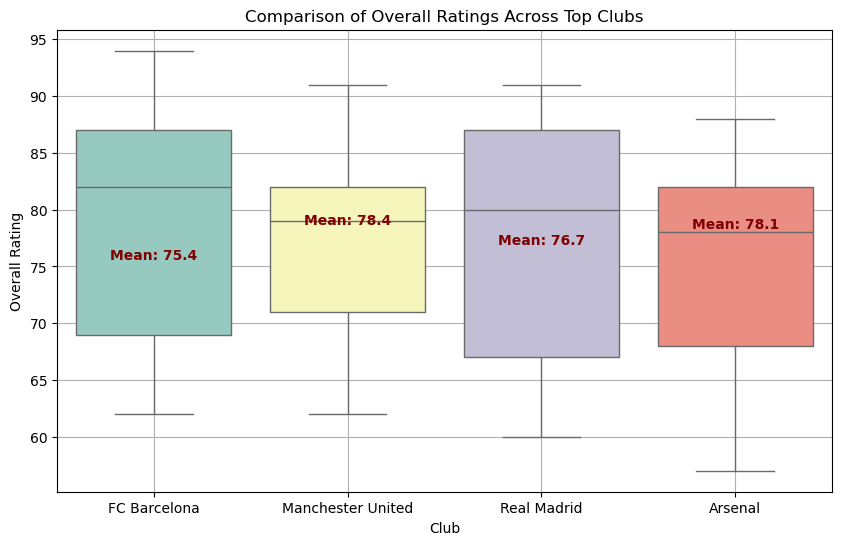

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

top_clubs = df[df['club_team'].isin(['FC Barcelona', 'Real Madrid', 'Manchester United', 'Arsenal'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='club_team', y='overall_rating', data=top_clubs, showfliers=True, palette="Set3")

# Add mean to the plot
means = top_clubs.groupby('club_team')['overall_rating'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontweight='bold', color='maroon')

plt.title('Comparison of Overall Ratings Across Top Clubs')
plt.xlabel('Club')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

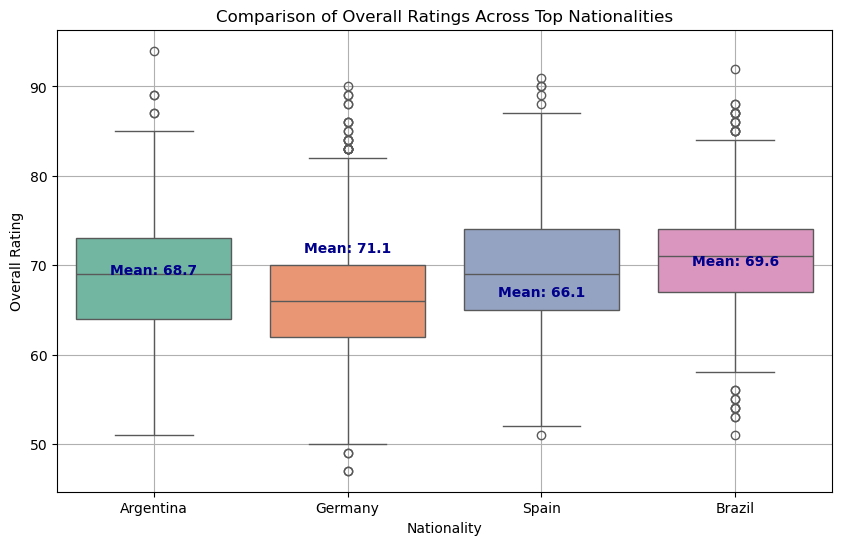

In [44]:
top_nationalities = df[df['nationality'].isin(['Argentina', 'Germany', 'Spain', 'Brazil'])]

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='nationality', y='overall_rating', data=top_nationalities, showfliers=True, palette="Set2")

# Add mean to the plot
means = top_nationalities.groupby('nationality')['overall_rating'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontweight='bold', color='darkblue')

plt.title('Comparison of Overall Ratings Across Top Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

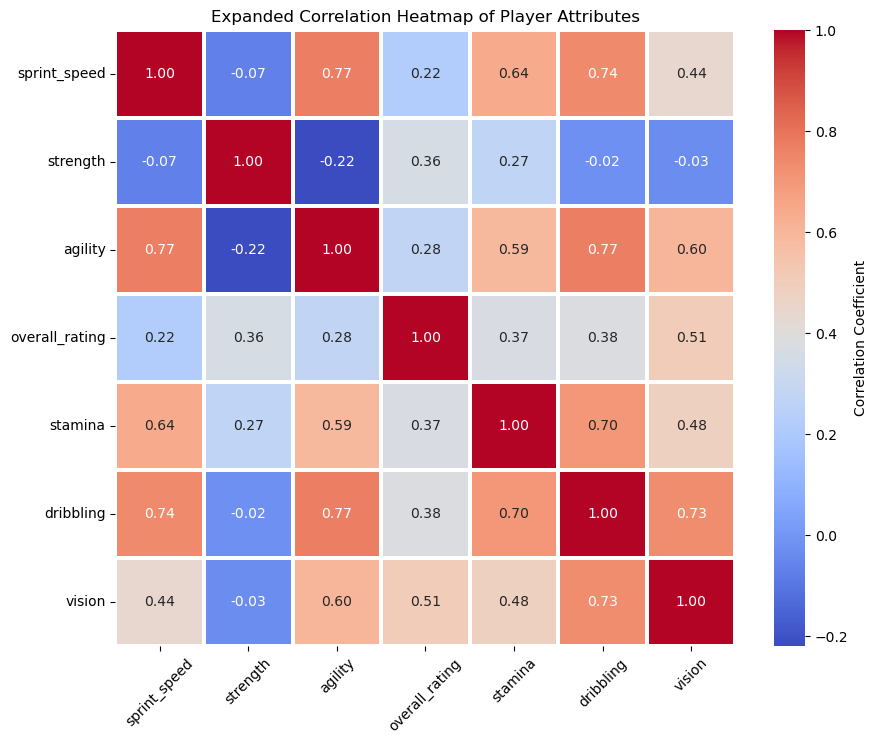

In [46]:
# Selecting a range of attributes
attributes = df[['sprint_speed', 'strength', 'agility', 'overall_rating', 'stamina', 'dribbling', 'vision']]

# Calculating the correlation matrix
corr = attributes.corr()

# Creating the expanded heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Expanded Correlation Heatmap of Player Attributes')
plt.xticks(rotation=45)  # Rotating attribute names for better readability
plt.yticks(rotation=0)
plt.show()